# Exportando um relatório em pdf da variações do preço de criptomoedas utilizando python

## Bibliotecas necessárias

Para fazer este projeto, foram utilizadas as seguintes bibliotecas do Python,

In [5]:
# libs de análise e manipulação dos dados
import pandas as pd
import numpy as np
import pandas_datareader.data as web

# libs de visualização dos dados e análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# lib tratamento de datas
import datetime

# lib para aquisição dos dados financeiros
import yfinance as yf
yf.pdr_override()   # função necessária para correta importação dos dados

## Importando os dados utilizando API Yahoo Finance

Para baixar os dados necessários do Bitcoin da API yfinance, é necessário definir alguns parâmetros. 

Primeiro, passar qual o "símbolo" da ação em questão. No caso, como o objetivo é analisar o variação do preço dos bitcoins em dólar, utiliza-se o código em formato de texto str 'BTC-USD'.

Segundo, necessário passar o período do tempo em que se deseja acessar tais dados. Isto pode ser feito de duas formas, passando as datas de início e fim da análise, ou informando o período em q se deseja analisar (dias, meses ou anos). Neste projeto, utilizou-se os dados referentes a 6 meses.

In [6]:
# Definindo o símbolo da ação de interesse
simbolo = 'BTC-USD'

# definindo o período de tempo
periodo = '6mo'

Agora os dados podem ser coletados conforme segue abaixo,

In [7]:
dados = web.get_data_yahoo(simbolo, period = periodo)

[*********************100%%**********************]  1 of 1 completed


Exibindo as primeiras 5 linhas do dataset importado,

In [8]:
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943


Acessando as estatísticas descritivas por coluna,

In [9]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,28423.591818,28816.012120,28073.563397,28455.321527,28455.321527,1.386171e+10
std,2415.446670,2497.988773,2405.256421,2459.141723,2459.141723,5.771469e+09
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,26564.056641,26888.882812,26240.701172,26567.632812,26567.632812,1.044652e+10
50%,27654.636719,28047.238281,27215.552734,27658.775391,27658.775391,1.281083e+10
75%,29896.382812,30199.433594,29638.095703,29909.337891,29909.337891,1.565637e+10
max,35441.578125,35919.843750,34765.363281,35437.253906,35437.253906,4.493500e+10


Mais informações do dataset,

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2023-05-07 to 2023-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       185 non-null    float64
 1   High       185 non-null    float64
 2   Low        185 non-null    float64
 3   Close      185 non-null    float64
 4   Adj Close  185 non-null    float64
 5   Volume     185 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


## Médias móveis

A fim de se visualizar os preços de fechamento do bitcoin ao longo de todo o período avaliado, plotou-se o gráfico abaixo. 

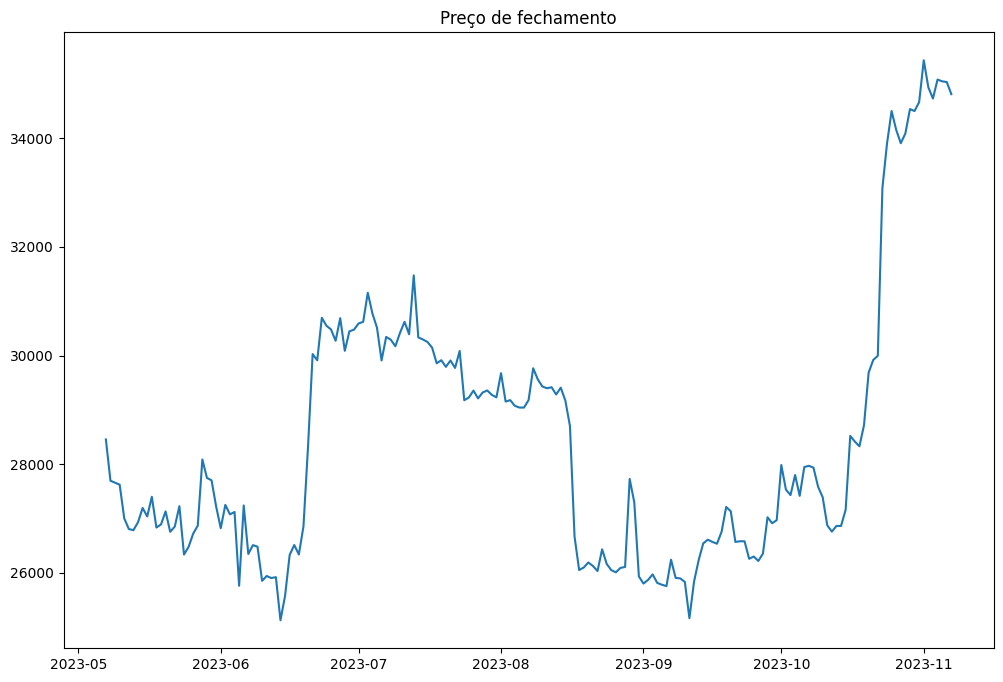

In [12]:
plt.figure(figsize=(12,8))
plt.plot(dados['Close'])
plt.title('Preço de fechamento');

É muito comum em gráficos de variação de preços, ou até mesmo em gráficos de varejo, observar um comportamento oscilante dos dados ao longo do tempo. Para se avaliar melhor quais são as tendências dos dados, utiliza-se um gráfico plotando-se as médias móveis dos dados. Basicamente, a média móvel vai "amenizar" estes picos, suavizando a curva e permitindo melhores insights a partir das análises.

Para fazer o cálculo da média móvel a respeito dos dados de fechamento do preço dos bitcoins, utilizou-se da função rolling( ), que permite calcular estatísticas em janelas predefinidas.

Calculando-se então as médias móveis, considerando uma janela de 5 dias,

In [13]:
window = 5
dados['Close'].rolling(window = window).mean()

Date
2023-05-07             NaN
2023-05-08             NaN
2023-05-09             NaN
2023-05-10             NaN
2023-05-11    27686.114453
                  ...     
2023-11-03    34855.592969
2023-11-04    34971.559375
2023-11-05    35047.874219
2023-11-06    34967.897656
2023-11-07    34942.931250
Name: Close, Length: 185, dtype: float64

Desta forma, plotou-se o gráfico de linhas abaixo, com os dados do preço de fechamento e os dados da média móvel considerando 5 dias e 25 dias.

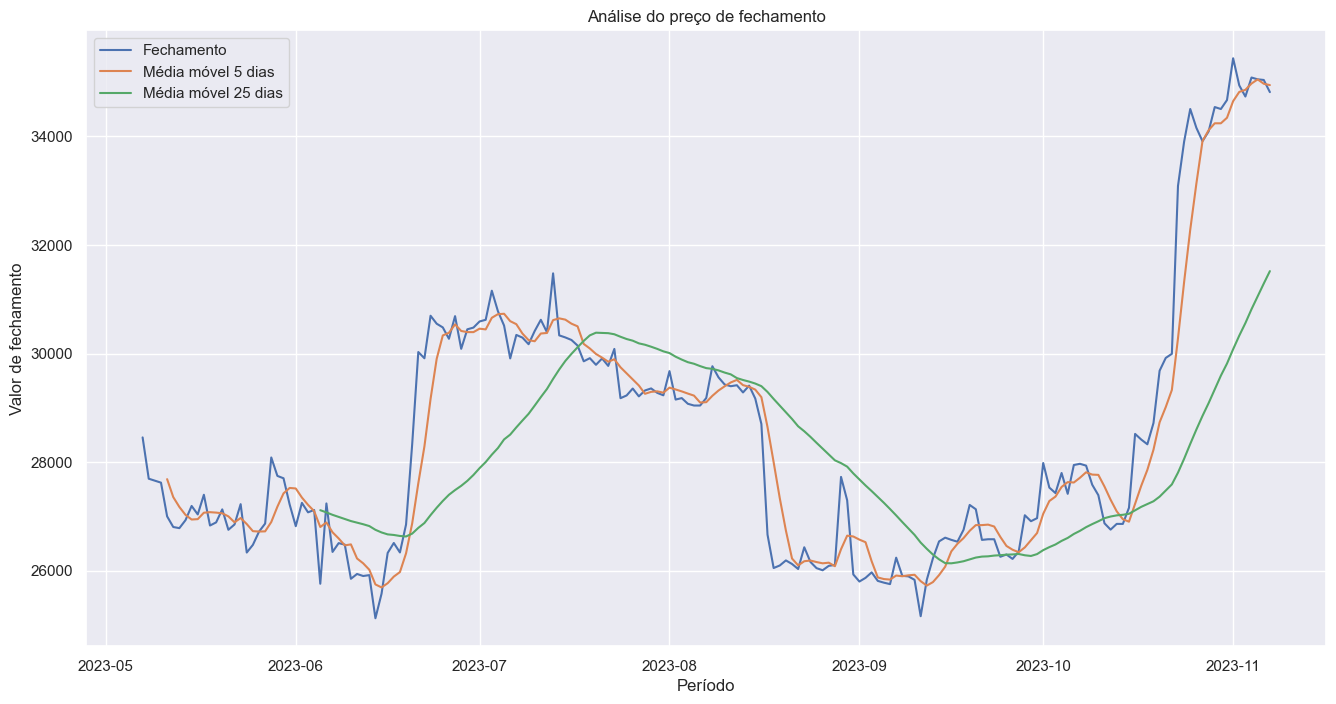

In [22]:
# ajustando o tamanho do gráfico
plt.figure(figsize = (16, 8))

# definindo a janela para as médias móveis
janela = 5

# plots
plt.plot(dados['Close'])                                        # preço de fechamento
plt.plot(dados['Close'].rolling(window = janela).mean())        # média móvel de 5 dias
plt.plot(dados['Close'].rolling(window = janela + 25).mean())   # média móvel de 25 dias

# definindo a legenda para cada uma das curvas do gráfico
plt.legend(['Fechamento', 'Média móvel 5 dias', 'Média móvel 25 dias'])

# definindo o título do gráfico e os nomes dos eixos
plt.ylabel('Valor de fechamento')
plt.xlabel('Período')
plt.title('Análise do preço de fechamento')

# exibindo as linhas de grade
plt.grid(visible=True)

plt.show()

## Análises utilizando Plotly